In [ ]:
import warnings
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, log_loss)
from sklearn.linear_model import LogisticRegression
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

set_printoptions(precision=2)

In [ ]:
columns = ['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'TotalSteps', 'active']
df = pd.read_csv(r'C:\Users\AyanC\git_ai_projects\Transaction\zendata_processed_49.csv')
df = df[columns]

In [ ]:
print (df.corr(method='pearson'))
#print (df.skew())

In [ ]:
X = df.iloc[:,:5].astype('float')
y= df.iloc[:,5].astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,y)

set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:5])

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Number of Features: %d", fit.n_features_)
print("Selected Features: %s", fit.classes_)
print("Feature Ranking: %s", fit.ranking_)

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

In [ ]:
def plot_ml_model(X, y, fold):
    plt.close('all')   
    algos = ["SVM-linear","SVM-Kernel","GaussianNB","BernoulliNB", "ComplementNB","DTree-gini","DTree-entropy","RF-50","RF-100", "RF-150", "KNN-2", 
             "KNN-6", "LDA", "Bagging", "AdaBoost", "XTree-50", "XTree-100", "XTree-150", "XTree-200", "GradBoost", "VC"]
    
    num_trees = 100
    seed = 7
    max_features = 4
    
    estimators = []    
    model1 = DecisionTreeClassifier()
    estimators.append(('cart', model1))
    model2 = SVC()
    estimators.append(('svm', model2))
    
    clfs = [SVC(kernel='linear'),
            SVC(kernel='rbf'),
            GaussianNB(),
            BernoulliNB(),
            ComplementNB(),
            DecisionTreeClassifier(),
            DecisionTreeClassifier(criterion="entropy"),
            RandomForestClassifier(n_estimators = 50),
            RandomForestClassifier(n_estimators = 100),
            RandomForestClassifier(n_estimators = 150),
            KNeighborsClassifier(n_neighbors = 2),  
            KNeighborsClassifier(n_neighbors = 6),
            LinearDiscriminantAnalysis(),
            BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = num_trees, random_state = seed),
            AdaBoostClassifier(n_estimators = num_trees, random_state = seed),
            ExtraTreesClassifier(n_estimators=50, max_features=max_features),
            ExtraTreesClassifier(n_estimators=100, max_features=max_features),
            ExtraTreesClassifier(n_estimators=150, max_features=max_features),
            ExtraTreesClassifier(n_estimators=200, max_features=max_features),
            GradientBoostingClassifier(n_estimators = num_trees, random_state = seed),
            VotingClassifier(estimators)
            ]
    
    cv_results = []
    
    scoring = 'f1'
    for classifiers in clfs:
        cv_score = cross_val_score(classifiers,X,y,cv=fold,scoring=scoring)
        #print (cv_score)
        cv_results.append(cv_score.mean()*100)
        
    cv_mean = pd.DataFrame(cv_results,index=algos)
    cv_mean.columns=["Accuracy"]
    print (cv_mean.sort_values(by="Accuracy",ascending=False))
    cv_mean.plot.bar(figsize=(10,5))
    
    #scatter plot
    scores=cv_mean["Accuracy"]
    #create traces
    trace1 = go.Scatter(x = algos, y= scores, name='Algortms Name', marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=algos
                )
    data = [trace1]

    layout = go.Layout(barmode = "group", xaxis= dict(title= 'ML Algorithms',ticklen= 5, zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5, zeroline= False))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    plt.show()   

#print (X)
#print (y)
plot_ml_model(X, y, 5)

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': alphas, 'gamma' : gammas} 
scoring = 'accuracy' 

model = SVC(kernel='linear')
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring = scoring)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_*100))

In [13]:
from sklearn.model_selection import cross_val_score
clf =  GaussianNB()
scores = cross_val_score(clf, X, y, cv=5)

scores

array([0.63, 0.75, 0.7 , 0.8 , 0.34])

In [14]:
np.average(scores)

0.644119449106263

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.dummy import DummyClassifier

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))

In [8]:
from sklearn.metrics import matthews_corrcoef
from sklearn.dummy import DummyClassifier

features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=5)))
feature_union = FeatureUnion(features)
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('Dtree', DecisionTreeClassifier(criterion="entropy", max_depth = 12)))
model = Pipeline(estimators)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       106
         1.0       0.97      0.96      0.97        77
         2.0       0.94      0.93      0.94        55
         3.0       0.95      0.98      0.97        59
         4.0       1.00      1.00      1.00        91

    accuracy                           0.98       388
   macro avg       0.97      0.97      0.97       388
weighted avg       0.98      0.98      0.98       388

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       106
         1.0       0.97      0.96      0.97        77
         2.0       0.94      0.93      0.94        55
         3.0       0.95      0.98      0.97        59
         4.0       1.00      1.00      1.00        91

    accuracy                           0.98       388
   macro avg       0.97      0.97      0.97       388
weighted avg       0.98      0.98      0.98       388

0.979381443298969
[[10

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        38

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

1.0
[[17  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 21  0]
 [ 0  0  0  0 38]]
1.0
1.0


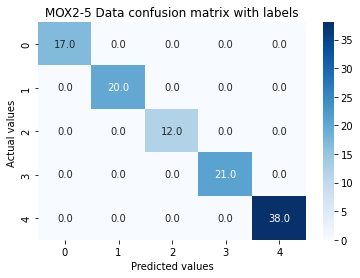

In [6]:
estimators = []    
model1 = DecisionTreeClassifier()
estimators.append(('cart', model1))
model2 = SVC()
estimators.append(('svm', model2))
max_features = 4
num_trees = 100
seed = 7
model = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(accuracy_score(y_test, y_pred))

import seaborn as sns 

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f") 
ax.set_title('MOX2-5 Data confusion matrix with labels') 
ax.set_xlabel('Predicted values') 
ax.set_ylabel('Actual values ')

fig = ax.get_figure()
fig.savefig('GB_moxdata_confusion.png', dpi=300)

In [5]:
parameters = {       
                  'max_depth'    : [4,6,8,10,12]
             }
scoring = 'accuracy' 

model = DecisionTreeClassifier(criterion="entropy", 'max_depth' = 10)
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring = scoring)
grid.fit(X, y)

print((grid.best_params_, grid.best_score_, grid.best_score_))


({'max_depth': 10}, 0.9715975385598977, 0.9715975385598977)


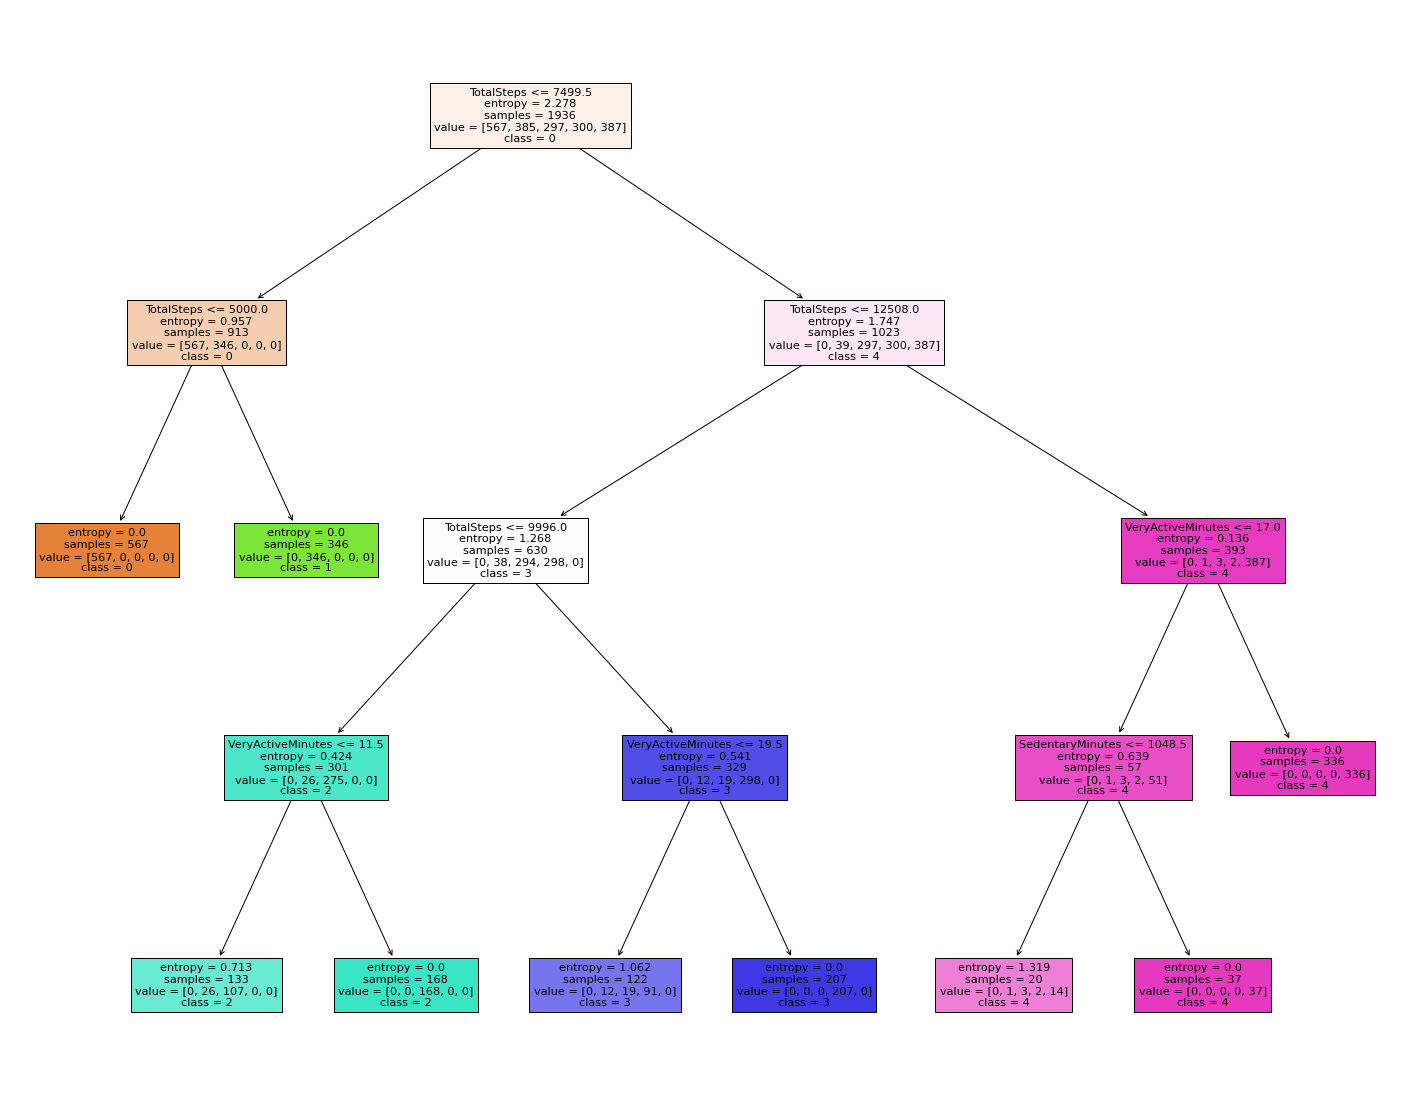

In [22]:
import graphviz
from sklearn import tree

model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'TotalSteps'],  
                   class_names=['0','1','2','3','4'],
                   filled=True)

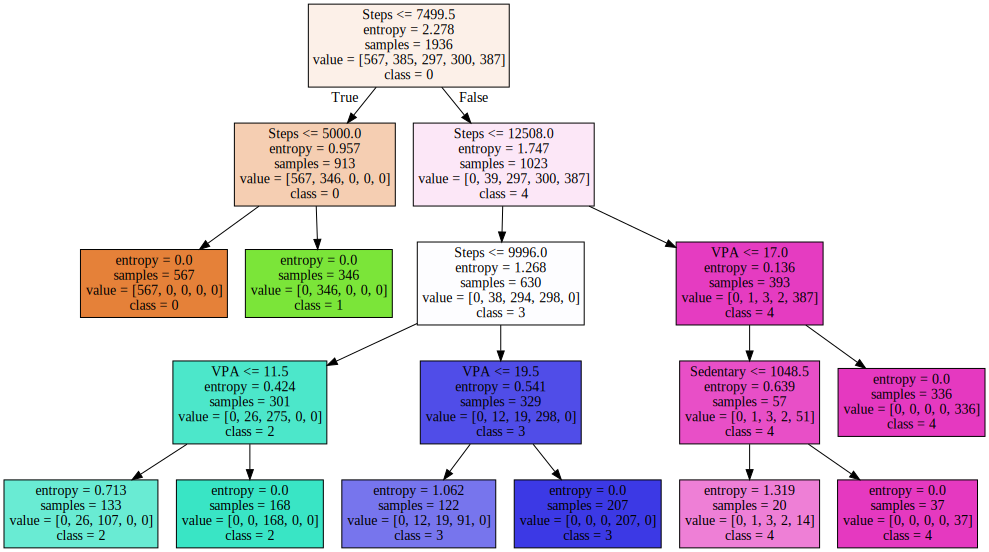

In [29]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['Sedentary', 'LPA', 'MPA', 'VPA', 'Steps'],  
                                class_names=['0','1','2','3','4'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="dot") 

graph.render(filename='graph')

graph

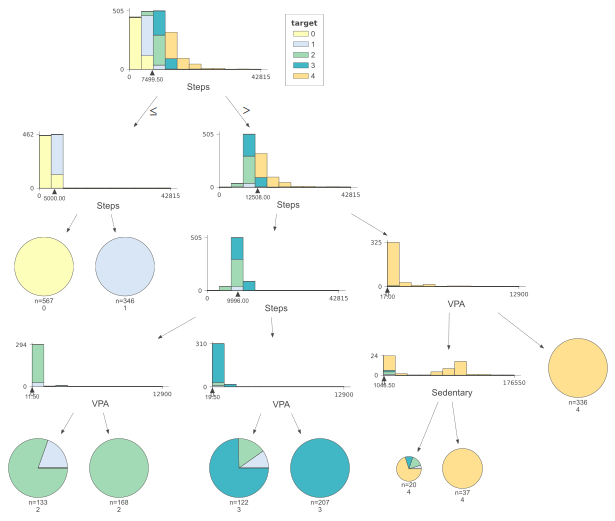

In [30]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, X, y,
                target_name="target",
                feature_names=['Sedentary', 'LPA', 'MPA', 'VPA', 'Steps'],  
                class_names=['0','1','2','3','4']
              )


viz

>1, train: 0.50, test: 0.47
>2, train: 0.69, test: 0.71
>3, train: 0.82, test: 0.82
>4, train: 0.97, test: 0.97
>5, train: 0.97, test: 0.97
>6, train: 0.97, test: 0.97
>7, train: 0.98, test: 0.97
>8, train: 0.99, test: 0.97
>9, train: 0.99, test: 0.97
>10, train: 1.00, test: 0.97
>11, train: 1.00, test: 0.97
>12, train: 1.00, test: 0.97
>13, train: 1.00, test: 0.97
>14, train: 1.00, test: 0.97
>15, train: 1.00, test: 0.97
>16, train: 1.00, test: 0.97
>17, train: 1.00, test: 0.97
>18, train: 1.00, test: 0.97
>19, train: 1.00, test: 0.98
>20, train: 1.00, test: 0.97
>21, train: 1.00, test: 0.97
>22, train: 1.00, test: 0.97
>23, train: 1.00, test: 0.98
>24, train: 1.00, test: 0.98
>25, train: 1.00, test: 0.97
>26, train: 1.00, test: 0.97
>27, train: 1.00, test: 0.97
>28, train: 1.00, test: 0.98
>29, train: 1.00, test: 0.97
>30, train: 1.00, test: 0.97
>31, train: 1.00, test: 0.97
>32, train: 1.00, test: 0.97
>33, train: 1.00, test: 0.97
>34, train: 1.00, test: 0.97
>35, train: 1.00, test:

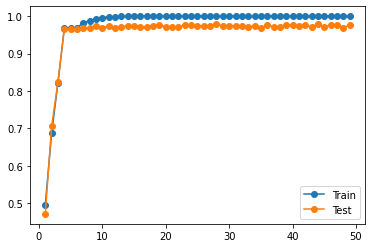

In [7]:
# define lists to collect scores

train_scores, test_scores = list(), list()

# define the tree depths to evaluate

values = [i for i in range(1, 50)]

# evaluate a decision tree for each depth

for i in values:

               # configure the model

               model = DecisionTreeClassifier(max_depth=i)

               # fit model on the training dataset

               model.fit(X_train, y_train)

               # evaluate on the train dataset

               train_yhat = model.predict(X_train)

               train_acc = accuracy_score(y_train, train_yhat)

               train_scores.append(train_acc)

               # evaluate on the test dataset

               test_yhat = model.predict(X_test)

               test_acc = accuracy_score(y_test, test_yhat)

               test_scores.append(test_acc)

               # summarize progress

               print('>%d, train: %.2f, test: %.2f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth

plt.plot(values, train_scores, '-o', label='Train')

plt.plot(values, test_scores, '-o', label='Test')

plt.legend()

plt.savefig('test_train.png', dpi = 300)

plt.show()



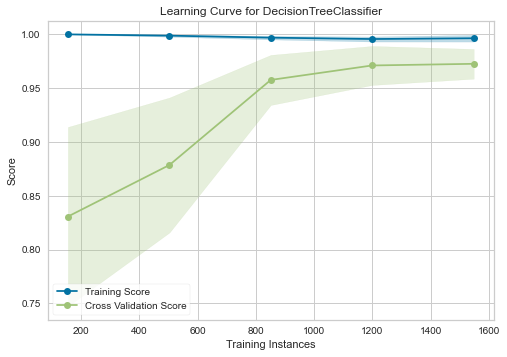

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
from yellowbrick.model_selection import learning_curve

rfc = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
print(learning_curve(rfc, X, y, cv=5, scoring='accuracy'))

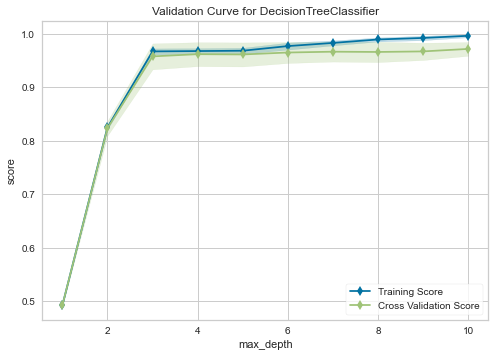

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5,
                estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=10),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [12]:
from yellowbrick.model_selection import validation_curve 

print(validation_curve(rfc, X, y, param_name="max_depth", n_jobs=-1,param_range=np.arange(1, 11), cv=5, scoring="accuracy"))

In [16]:
from sklearn.pipeline import Pipeline
 
estimators = []

estimators.append(('standardize', StandardScaler()))
estimators.append(('Dtree', DecisionTreeClassifier(criterion="entropy", max_depth = 10)))

model = Pipeline(estimators)

kfold = KFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9721090066331015


In [18]:
features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=5)))
feature_union = FeatureUnion(features)
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('Dtree', DecisionTreeClassifier(criterion="entropy", max_depth = 10)))
model = Pipeline(estimators)
kfold = KFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9591904419403819


In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (LDA)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [33]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion="entropy"), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

TypeError: validation_curve() missing 2 required keyword-only arguments: 'param_name' and 'param_range'